In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches

In [35]:
pos_for_size = {}
pocket_nums = {}
color_for_queueSize = {2:"red", 3:"blue", 4:"green", 5:"brown", 6:"orange", 7:"gray", 8:"yellow", 9:"maroon", 10:"olive", 11:"purple", 12:"aqua", 13:"navy", 14:"red", 15:"blue", 16:"green", 17:"brown", 18:"orange", 19:"gray", 20:"yellow", 21:"maroon", 22:"olive", 23:"purple", 24:"aqua", 25:"navy"}

In [61]:
def draw(data, load, xlabel, ylabel, title, filename, legend=[], legend_loc='', sizes_to_draw=[0, 100]):
  position = 1
  pocket_nums[load] = {}
  fig, ax = plt.subplots()
  load_data = data[data['load'] == load]
  uniq_sizes = load_data['size'].unique()
  uniq_sizes = [i for i in uniq_sizes if sizes_to_draw[0] <= i <= sizes_to_draw[1]]
  bps = []
  for size in uniq_sizes:
      pos_for_size[size] = []
      size_data = load_data[load_data['size'] == size]
      uniq_queueSizes = size_data['queueSize'].unique()
      bps = []
      for queueSize in uniq_queueSizes:
          pos_for_size[size].append(position)
          queueSize_data = size_data[size_data['queueSize'] == queueSize]
          pocket_nums[load][(size, queueSize)] = queueSize_data['pocketNum'].unique()[0]
          bp = ax.boxplot(queueSize_data['value'], positions=[position], widths=0.5, 
                  patch_artist=True, notch=True, boxprops=dict(facecolor=color_for_queueSize[queueSize]))
          bps.append(bp['boxes'][0])
          for element in ['boxes', 'whiskers', 'fliers', 'means', 'caps']:
            plt.setp(bp[element], color='black')
          plt.setp(bp['medians'], color = 'black')
          for patch in bp['boxes']:
            patch.set(facecolor=color_for_queueSize[queueSize])
          position += 1
      position += 2

  ax.set_xticklabels([str(i) for i in uniq_sizes])
  ax.set_xticks([(pos_for_size[i][-1] + pos_for_size[i][0]) / 2 for i in uniq_sizes])

  fig.set_figheight(12)
  fig.set_figwidth(18)

  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel, fontsize = 20)
  plt.tick_params(axis='both', which='major', labelsize=15)
  plt.title(title, fontsize = 30) 


  if len(legend):
    ax.legend(bps, legend, loc=legend_loc, fontsize=18)
  fig.savefig('/content/drive/MyDrive/Colab Notebooks/MIPT/graphics/' + filename)
  plt.show()

## Первичный анализ системы


In [12]:
data_l_num_nodes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/latencyTestNodes2.csv', sep=',', na_values='.')
data_t_num_nodes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/throughputTestNodes2.csv', sep=',', na_values='.')

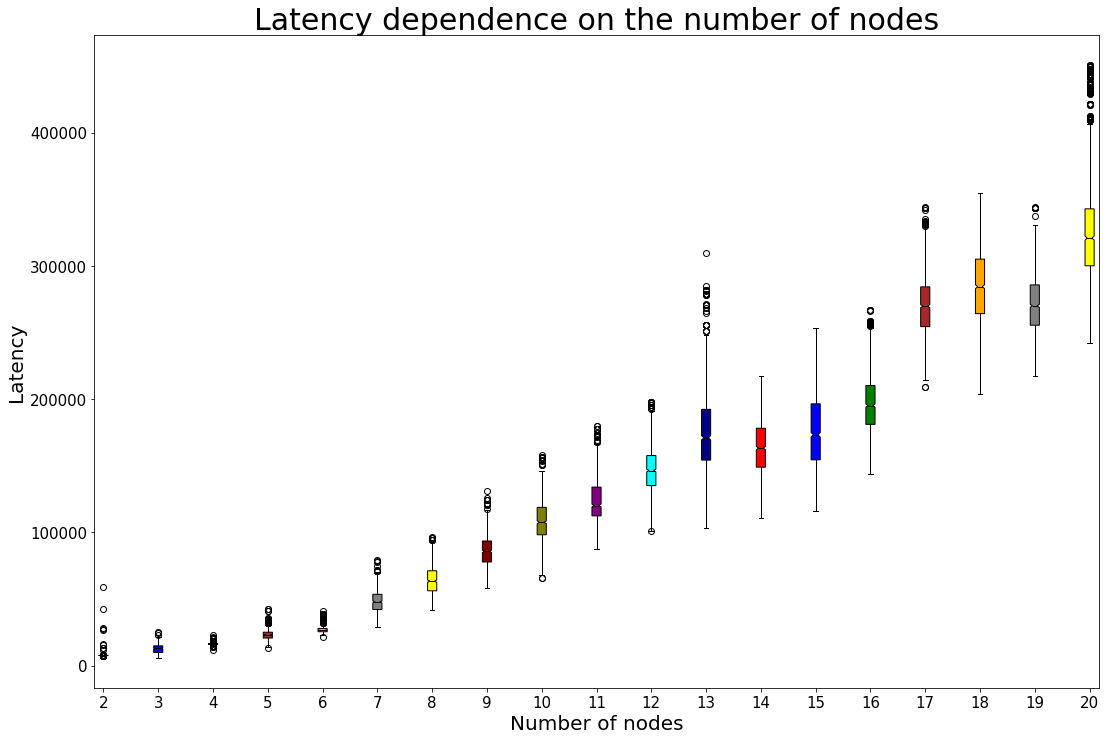

In [19]:
draw(data_l_num_nodes, 0.5, 'Number of nodes', 'Latency', 'Latency dependence on the number of nodes', 'latencyTestNodes2.jpg')

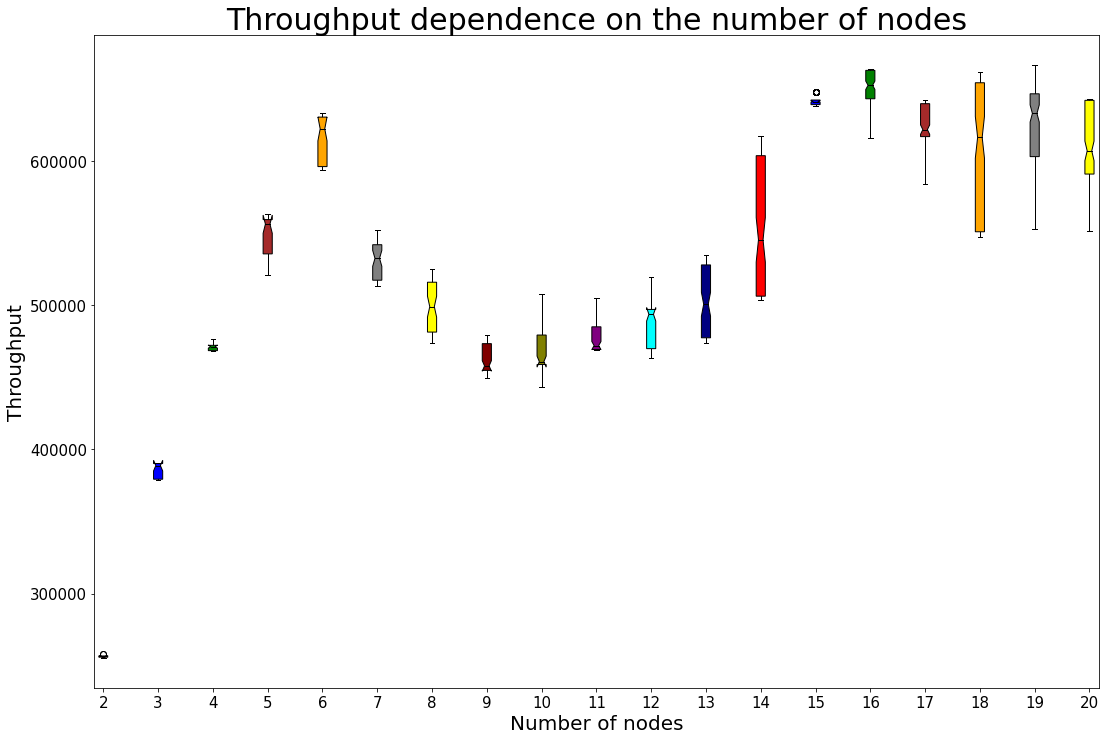

In [20]:
draw(data_t_num_nodes, 0.5, 'Number of nodes', 'Throughput', 'Throughput dependence on the number of nodes', 'throughputTestNodes2.jpg')

## Определение зависимости latency и throughput от размера очереди

In [69]:
data_l_load = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/lLoad2.csv', sep=',', na_values='.')
data_t_load = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/tLoad2.csv', sep=',', na_values='.')

In [70]:
signatures_queue_sizes = ['queue size 2', 'queue size 3', 'queue size 4', 'queue size 5', 'queue size 6', 'queue size 7', 
                          'queue size 8']

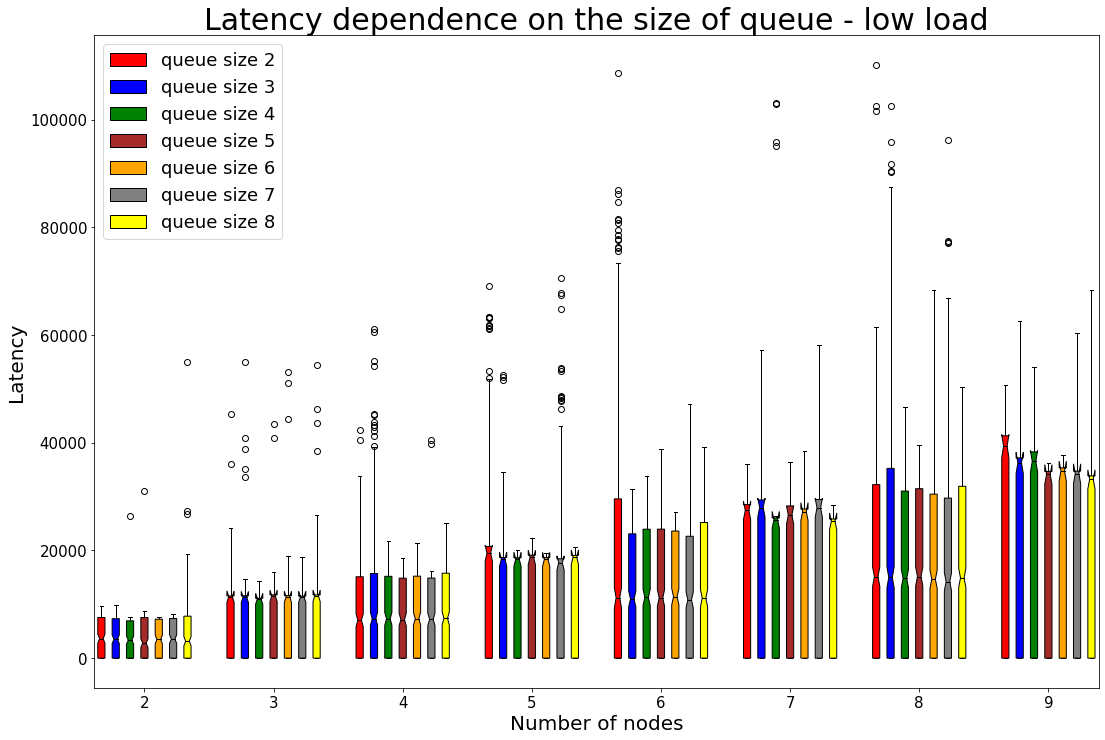

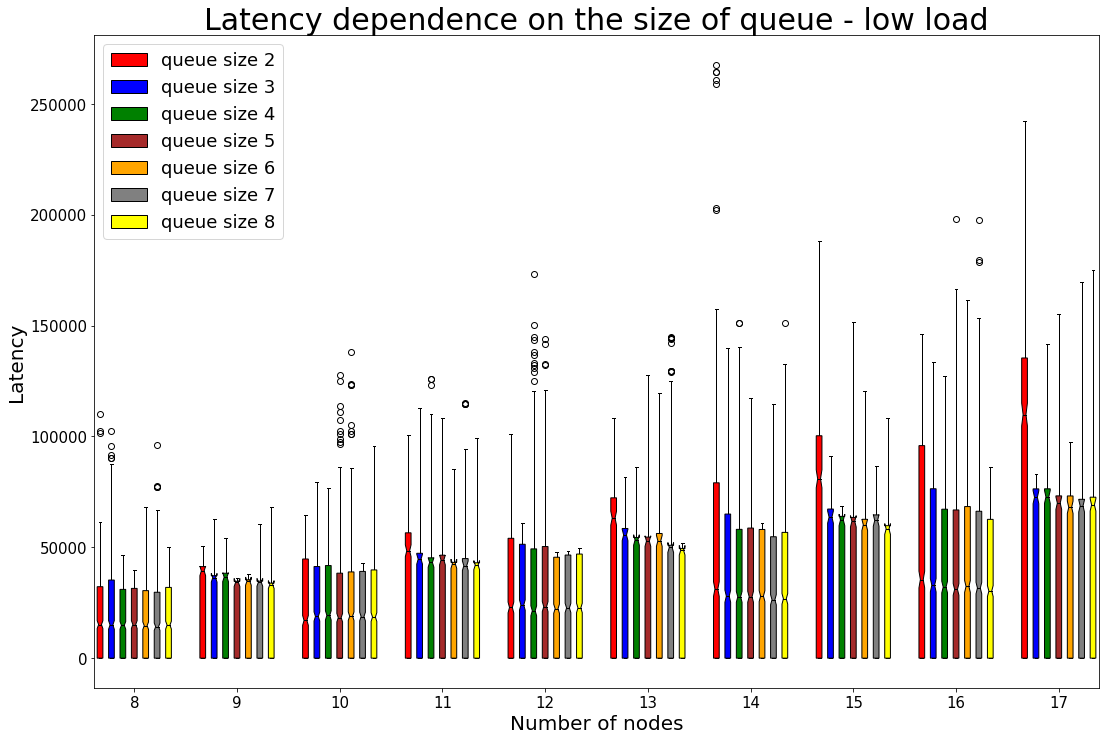

In [71]:
draw(data_l_load, 0.5, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - low load', 'latencyEqPocketsLow2_1.jpg',
     signatures_queue_sizes, 'upper left', [2, 9])
draw(data_l_load, 0.5, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - low load', 'latencyEqPocketsLow2_2.jpg',
     signatures_queue_sizes, 'upper left', [8, 17])

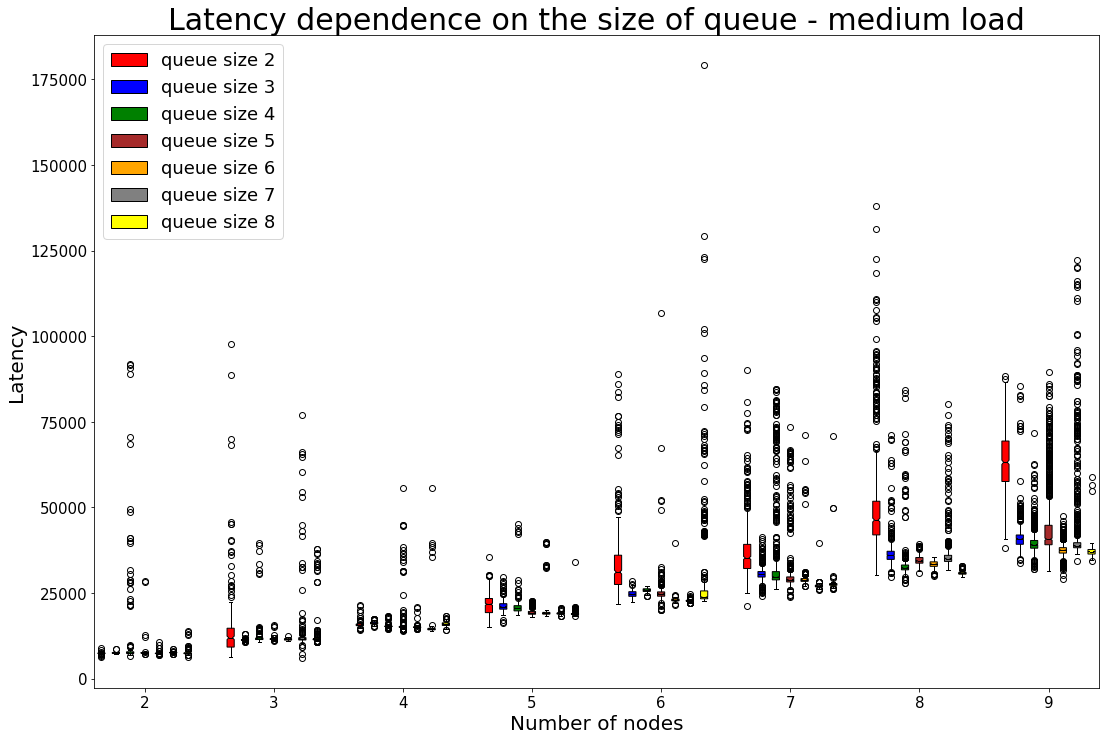

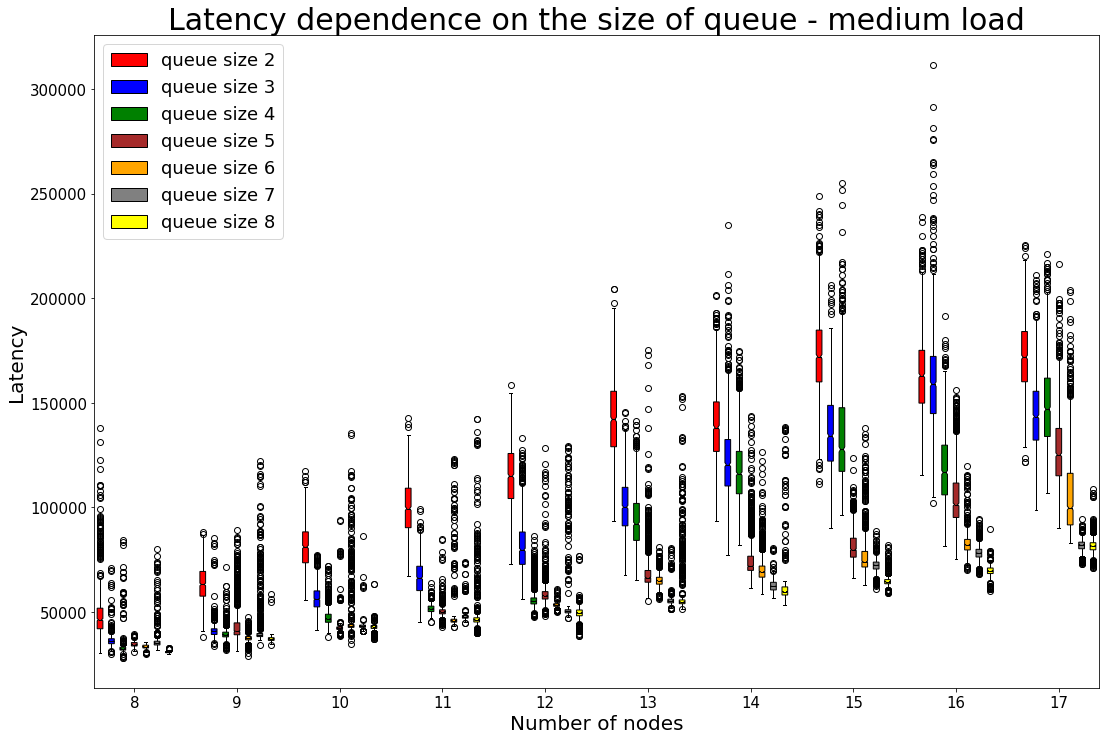

In [82]:
draw(data_l_load, 1, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - medium load', 'latencyEqPocketsMedium2_1.jpg',
     signatures_queue_sizes, 'upper left', [2, 9])
draw(data_l_load, 1, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - medium load', 'latencyEqPocketsMedium2_2.jpg',
     signatures_queue_sizes, 'upper left', [8, 17])

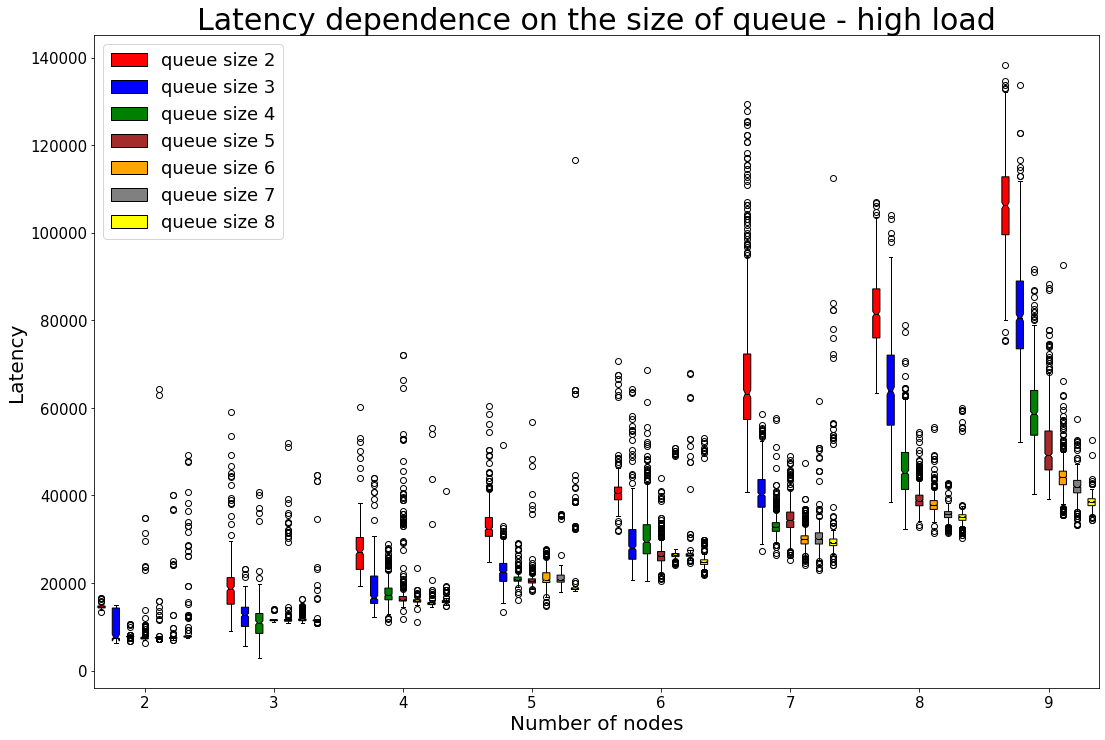

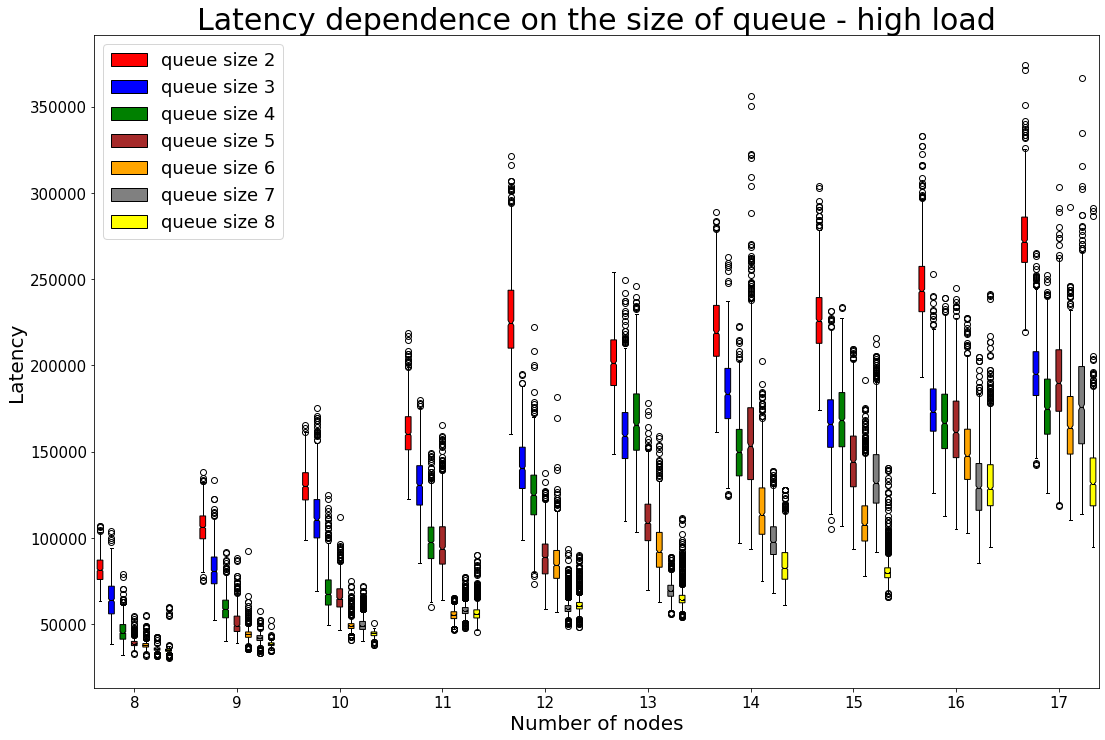

In [81]:
draw(data_l_load, 0.8, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - high load', 'latencyEqPocketsHigh2_1.jpg',
    signatures_queue_sizes, 'upper left', [2, 9])
draw(data_l_load, 0.8, 'Number of nodes', 'Latency', 'Latency dependence on the size of queue - high load', 'latencyEqPocketsHigh2_2.jpg',
    signatures_queue_sizes, 'upper left', [8, 17])

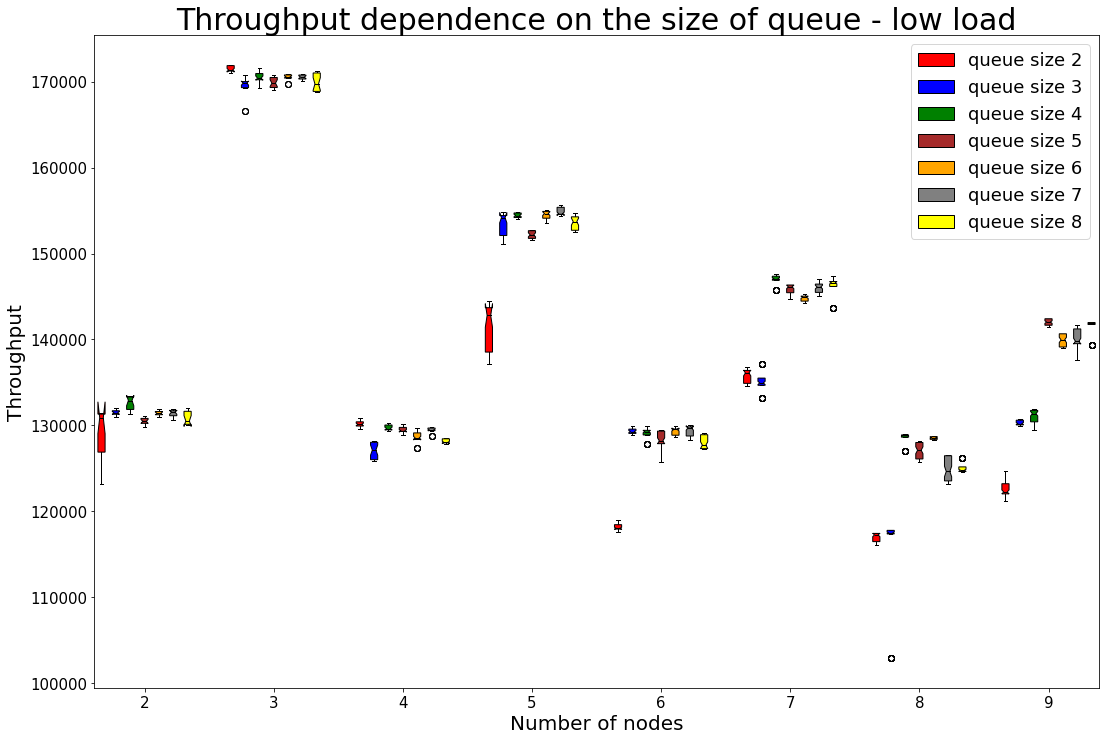

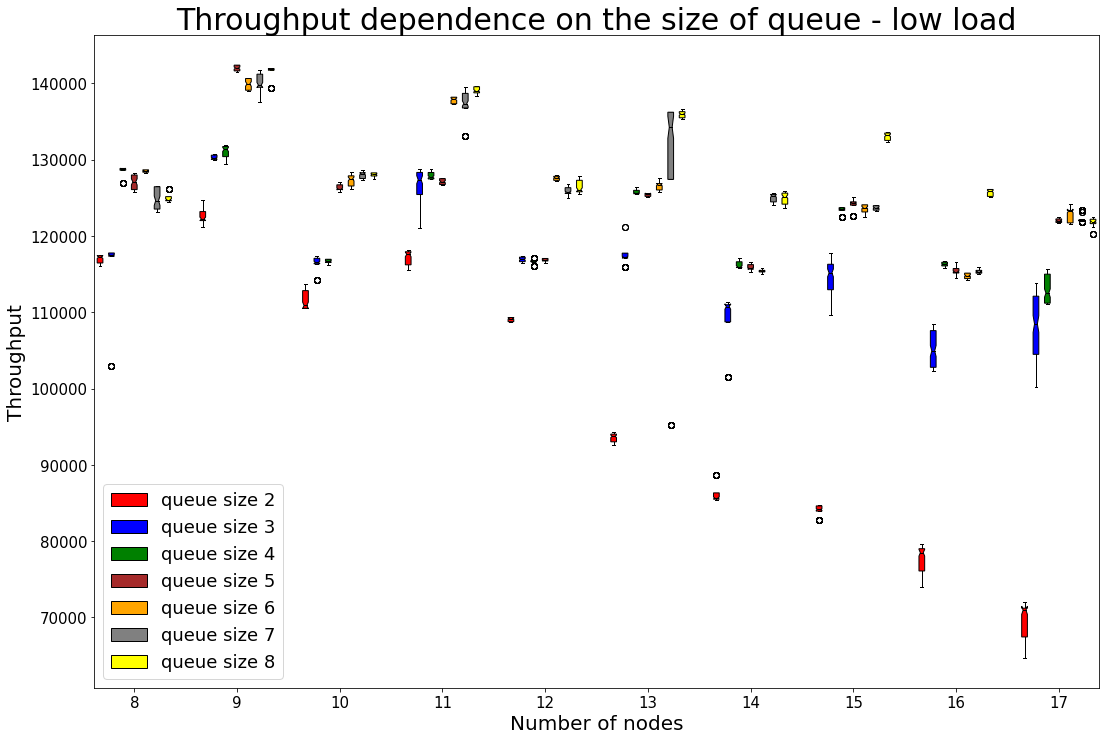

In [75]:
draw(data_t_load, 0.5, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - low load', 'throughputEqPocketsLow2_1.jpg',
    signatures_queue_sizes, 'upper right', [2, 9])
draw(data_t_load, 0.5, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - low load', 'throughputEqPocketsLow2_2.jpg',
    signatures_queue_sizes, 'lower left', [8, 17])

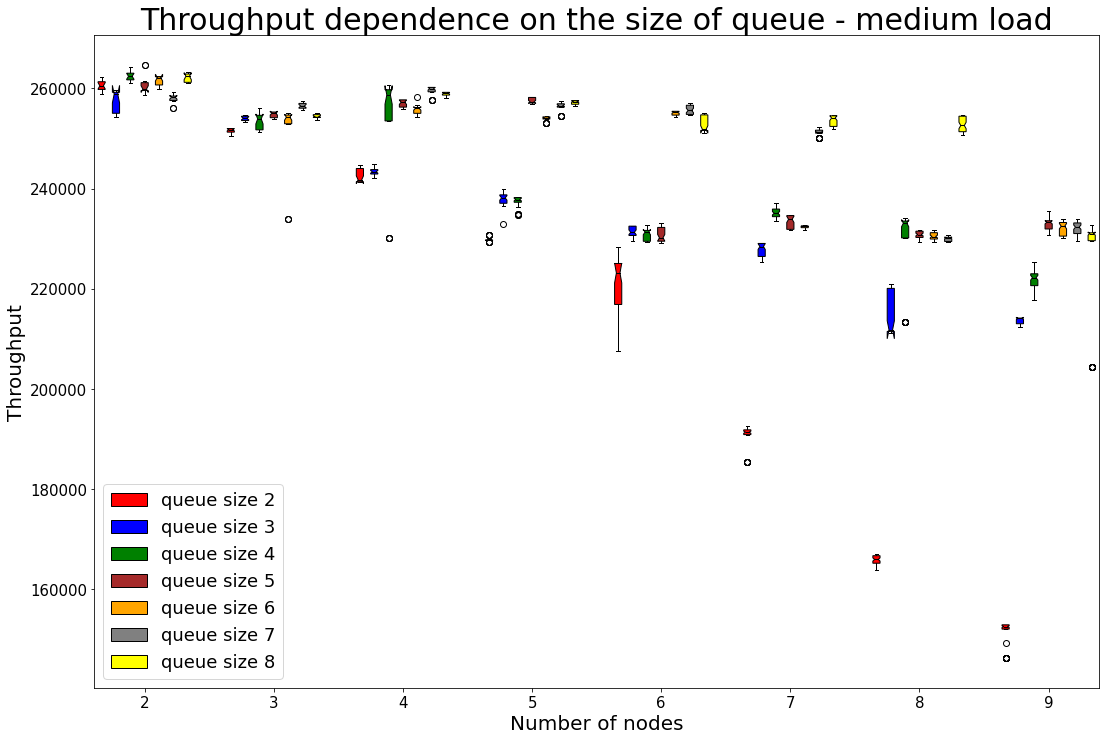

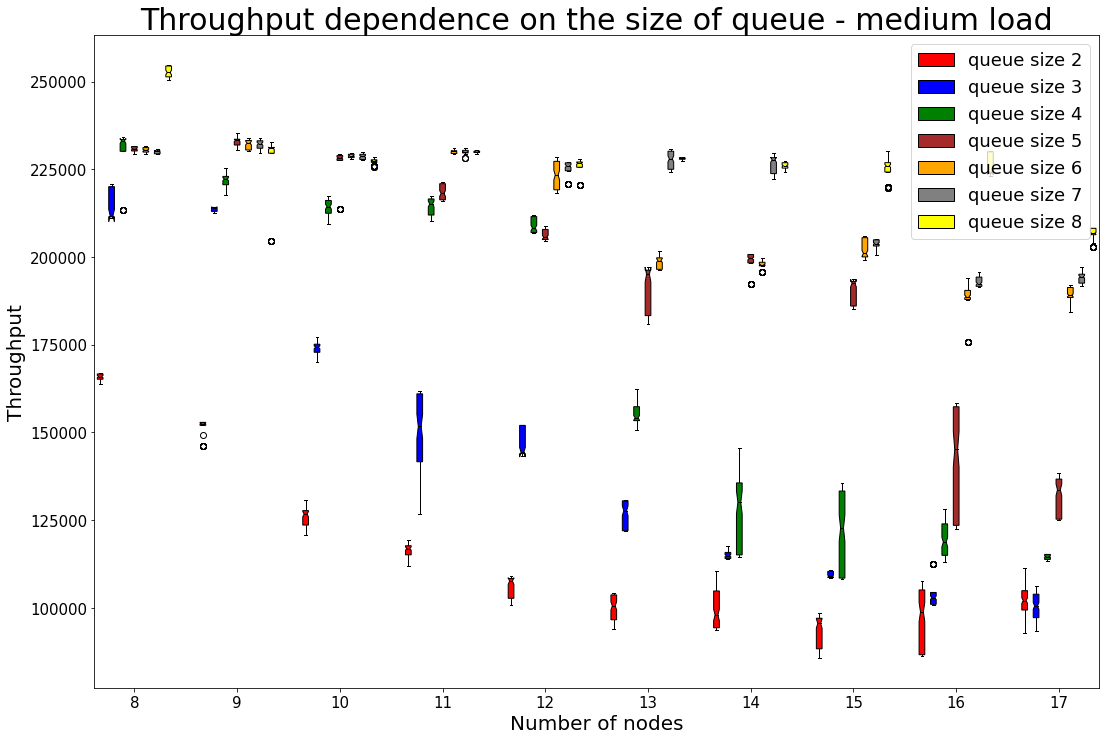

In [79]:
draw(data_t_load, 1, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - medium load', 'throughputEqPocketsMedium2_1.jpg',
     signatures_queue_sizes, 'lower left', [2,9])
draw(data_t_load, 1, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - medium load', 'throughputEqPocketsMedium2_2.jpg',
     signatures_queue_sizes, 'upper right', [8,17])

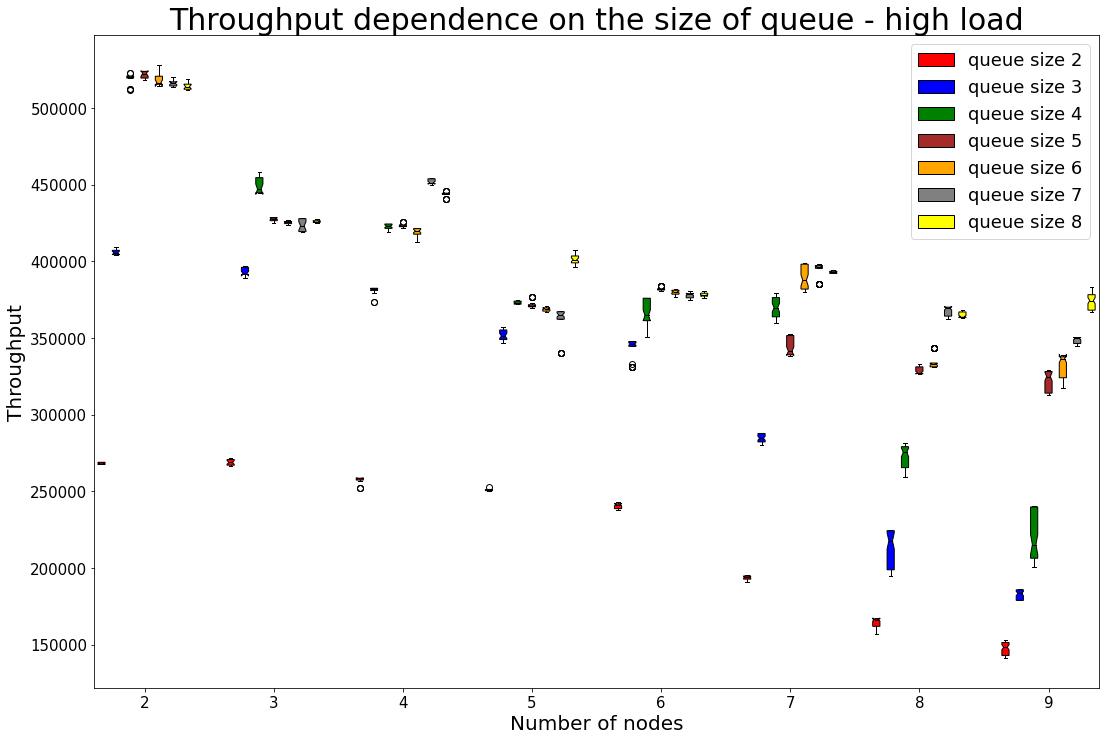

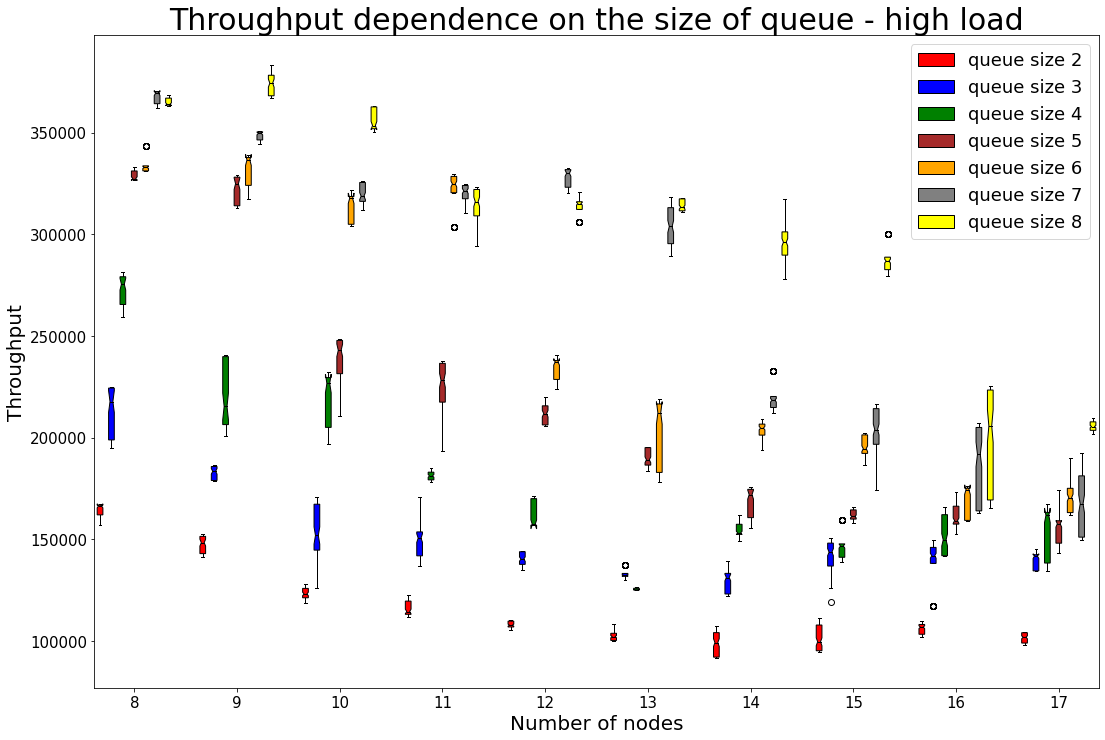

In [80]:
draw(data_t_load, 0.8, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - high load', 'throughputEqPocketsHigh2_1.jpg',
   signatures_queue_sizes, 'upper right', [2, 9])
draw(data_t_load, 0.8, 'Number of nodes', 'Throughput', 'Throughput dependence on the size of queue - high load', 'throughputEqPocketsHigh2_2.jpg',
   signatures_queue_sizes, 'upper right', [8, 17])

## A

In [83]:
def get_draw_values(data, queueSize):
  queueSize_data = data[data['queueSize'] == queueSize]
  return queueSize_data['pocketNum'].unique(), queueSize_data.groupby('pocketNum')['value'].mean().values

def draw_plots(data, size, queueSizes, xlabel, ylabel, title, filename):
  fig, ax = plt.subplots()
  for queueSize in queueSizes:
    x, y = get_draw_values(data, queueSize)
    plt.plot(x, y, label = ('queueSize = ' + str(queueSize)))
  plt.legend()
  fig.set_figheight(12)
  fig.set_figwidth(18)

  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel, fontsize = 20)
  plt.tick_params(axis='both', which='major', labelsize=15)
  plt.title(title, fontsize = 30) 
  fig.savefig('/content/drive/MyDrive/Colab Notebooks/MIPT/graphics/' + filename)
  plt.show()

In [84]:
data_l_dep_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/lPocket2_1.csv', sep=',', na_values='.')
data_t_dep_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/tPocket2_1.csv', sep=',', na_values='.')

In [86]:
size = 4
queueSizesBig = [4, 8, 12, 20, 28]

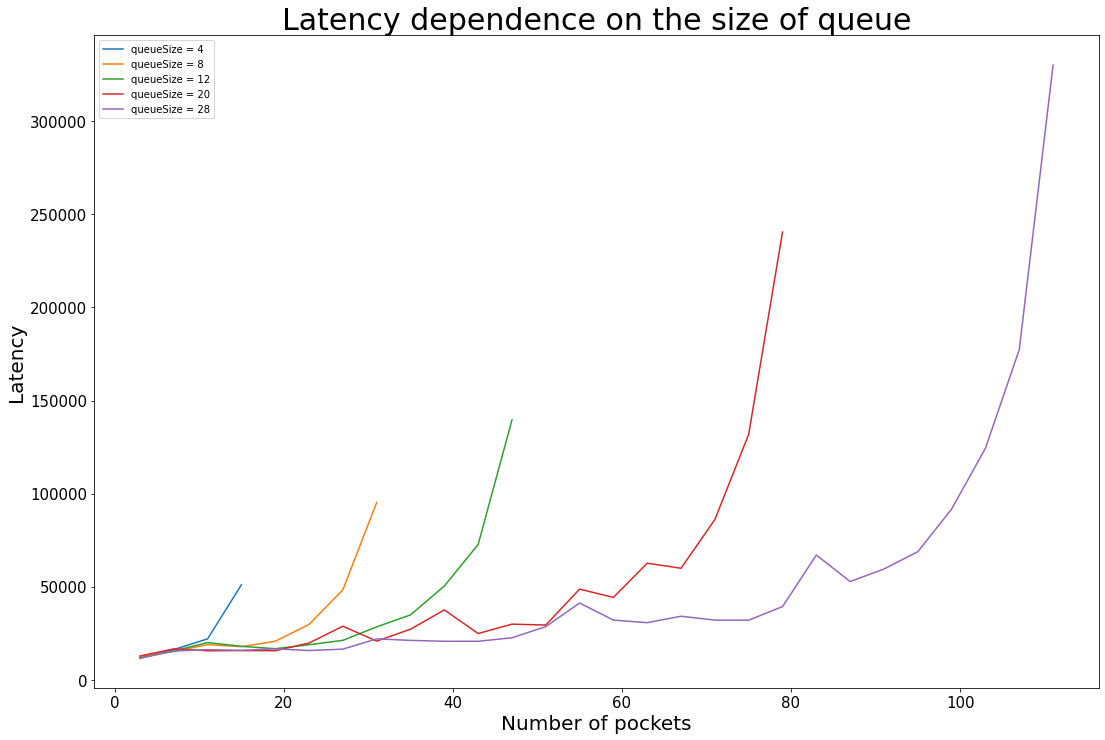

In [87]:
draw_plots(data_l_dep_pockets, 4, queueSizesBig,'Number of pockets', 'Latency', 'Latency dependence on the size of queue', 'latencyDepPocketsBig2_1.jpg')

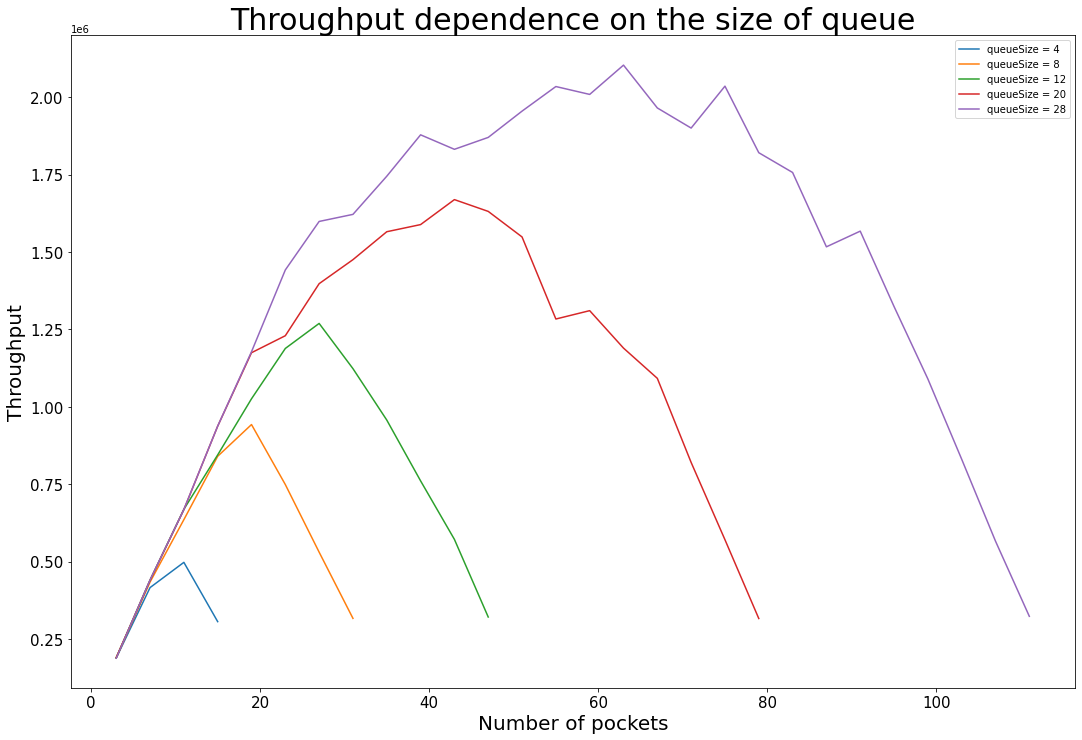

In [88]:
draw_plots(data_t_dep_pockets, 4, queueSizesBig,'Number of pockets', 'Throughput', 'Throughput dependence on the size of queue', 'throughputDepPocketsBig2_1.jpg')

In [89]:
data_l_dep_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/lPocket2_2.csv', sep=',', na_values='.')
data_t_dep_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/tPocket2_2.csv', sep=',', na_values='.')

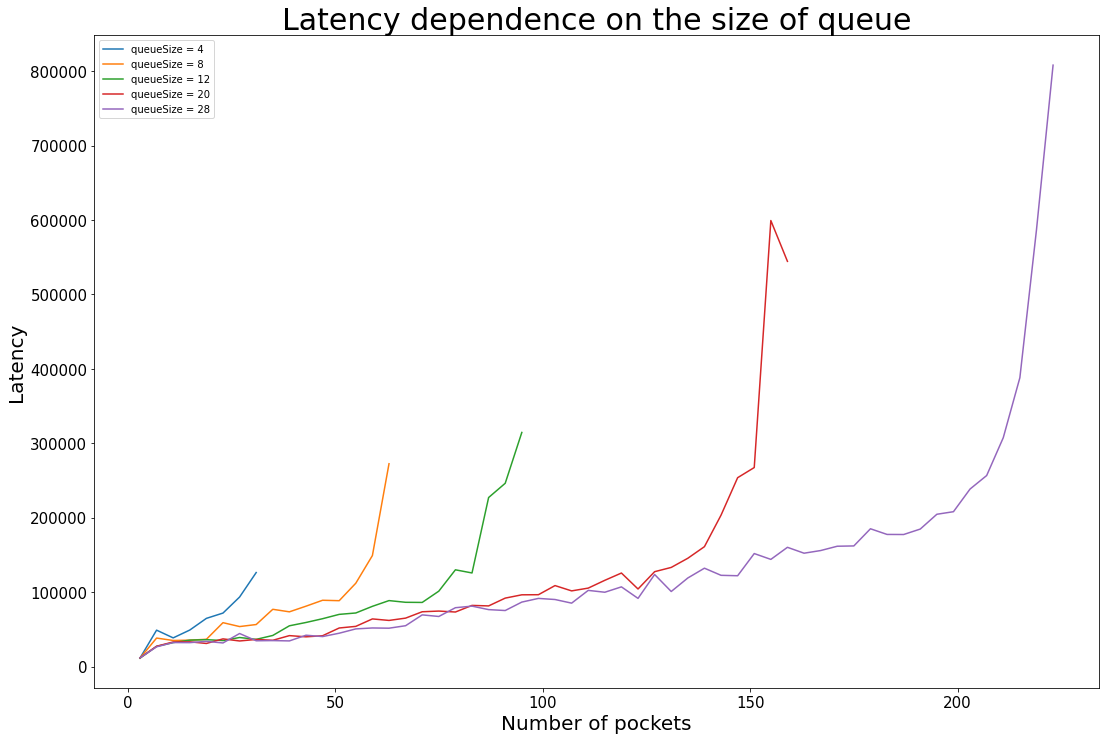

In [90]:
draw_plots(data_l_dep_pockets, 8, queueSizesBig,'Number of pockets', 'Latency', 'Latency dependence on the size of queue', 'latencyDepPocketsBig2_2.jpg')

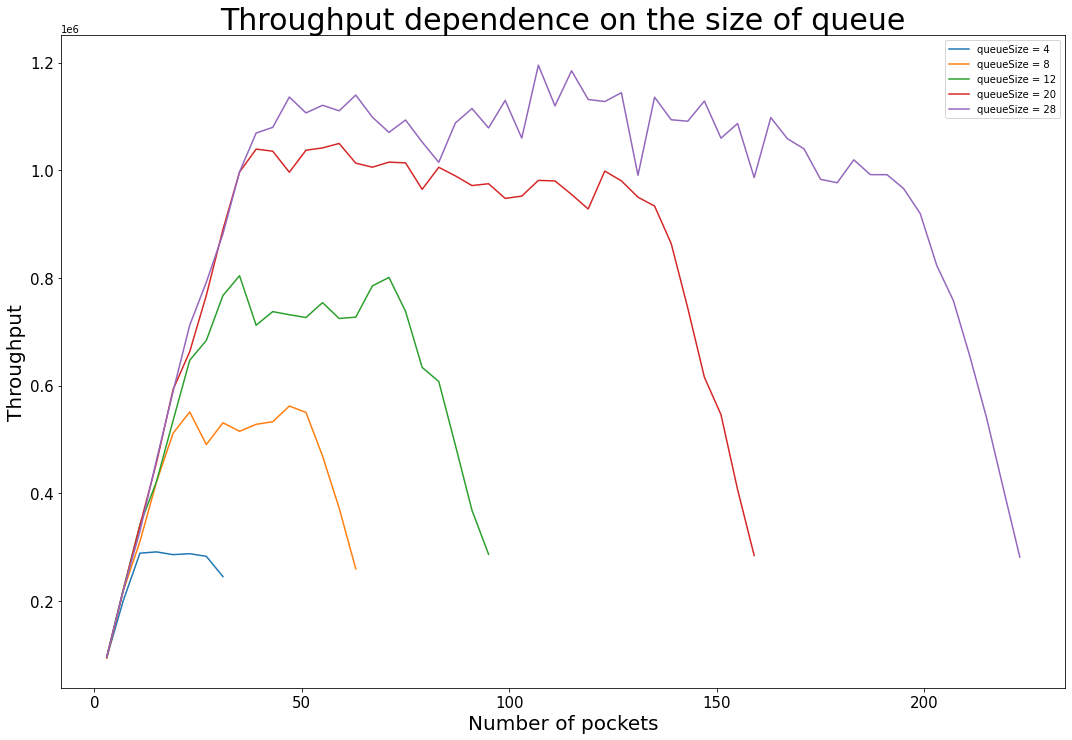

In [91]:
draw_plots(data_t_dep_pockets, 8, queueSizesBig,'Number of pockets', 'Throughput', 'Throughput dependence on the size of queue', 'throughputDepPocketsBig2_2.jpg')

In [92]:
data_l_dep_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/lPocket2_3.csv', sep=',', na_values='.')
data_t_dep_pockets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIPT/tPocket2_3.csv', sep=',', na_values='.')

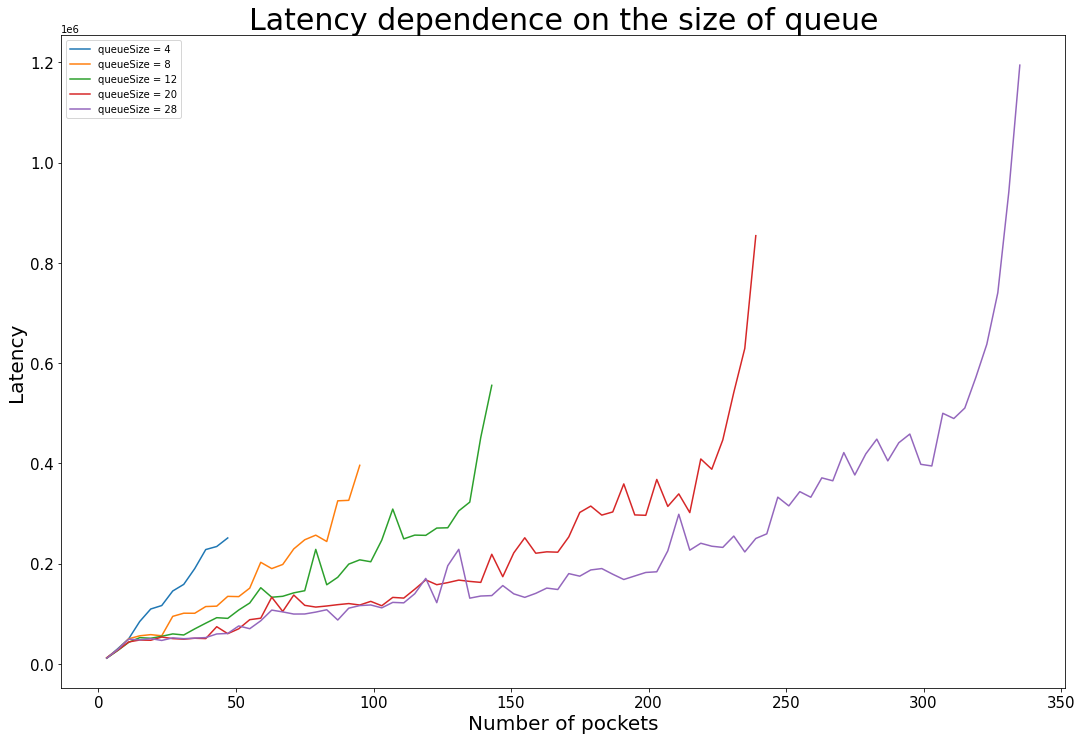

In [93]:
draw_plots(data_l_dep_pockets, 12, queueSizesBig,'Number of pockets', 'Latency', 'Latency dependence on the size of queue', 'latencyDepPocketsBig2_3.jpg')

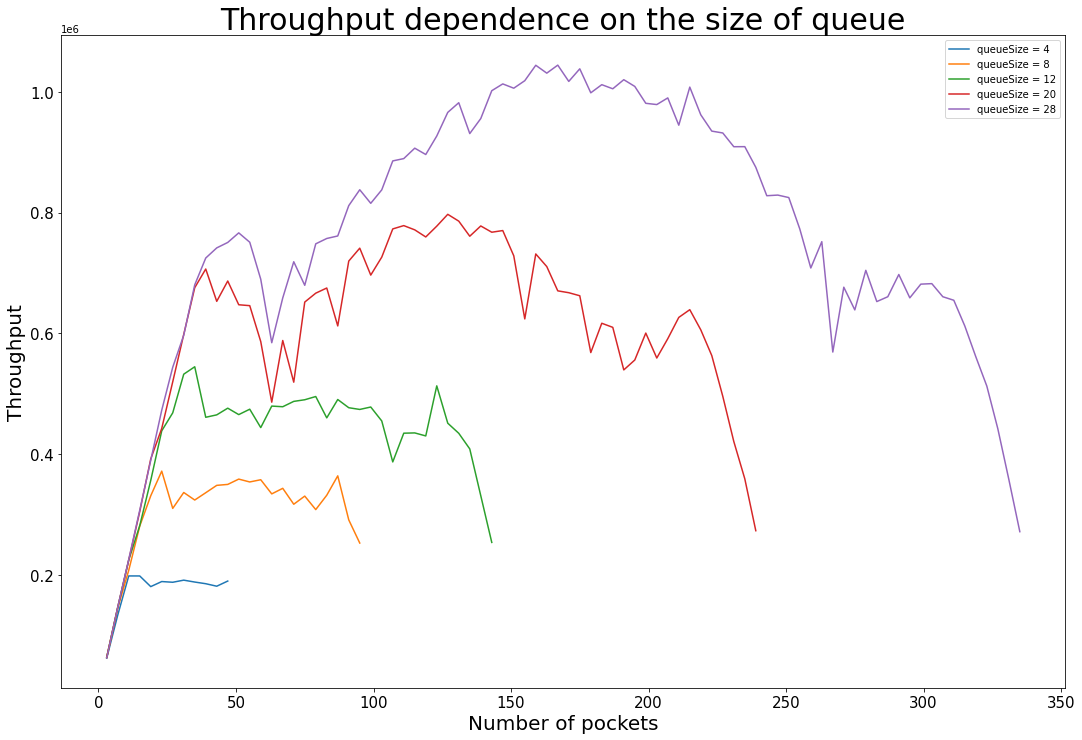

In [94]:
draw_plots(data_t_dep_pockets, 12, queueSizesBig,'Number of pockets', 'Throughput', 'Throughput dependence on the size of queue', 'throughputDepPocketsBig2_3.jpg')

## Остаток

In [ ]:
load_data = data[data['load'] == 0.2]
size_data = load_data[load_data['size'] == 6]
size_data[['load', 'size', 'queueSize', 'pocketNum']].drop_duplicates()


,load,size,queueSize,pocketNum
4300,0.2,6,2,3
4400,0.2,6,3,4
4500,0.2,6,4,5
4600,0.2,6,5,6
4700,0.2,6,6,8
4800,0.2,6,7,9
4900,0.2,6,8,10


In [68]:
data_t_load[data_t_load['load'] == 0.8]

,load,size,queueSize,pocketNum,value
